# Running pretrained image classification model on brain slice

In [8]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

from keras import backend as K

K.set_image_dim_ordering('th')

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

if __name__ == "__main__":
    im = cv2.resize(cv2.imread('../img/cat.jpg'), (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)

    # Test pretrained model
    model = VGG_16('../vgg16_weights_th_dim_ordering_th_kernels.h5')
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy')
    out = model.predict(im)
print(np.argmax(out))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/l

285


In [43]:
# Get image data w/ nibabel
import nibabel as nib
def get_data(filename):
    img = nib.load(filename)
    return img.get_data()
def scale(array):
    return (array-np.min(array))/(np.max(array) - np.min(array))
mri_data = scale(get_data('../data/case_001_2.nii.gz'))

(1, 3, 224, 224)

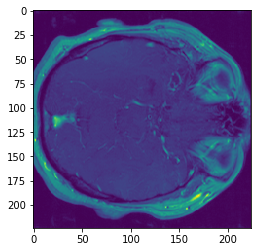

In [44]:
# Generate input to model (shape=(1,3,224,224))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.misc import imresize

img0 = imresize(mri_data[:,:,10], (224,224))
img = plt.imshow(img0) 

img0.resize((img0.shape[0],img0.shape[1],1))
img0_rgb = np.tile(img0,3)
img0_rgb = img0_rgb.transpose((2,0,1))
img0_rgb = np.expand_dims(img0_rgb, axis=0)
img0_rgb.shape

In [42]:
# Try classifying the input image
out = model.predict(img0_rgb)
print(np.argmax(out))
# 111 is a flatworm lol

111


In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_39 (ZeroPaddi (None, 3, 226, 226)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 64, 224, 224)      1792      
_________________________________________________________________
zero_padding2d_40 (ZeroPaddi (None, 64, 226, 226)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 64, 224, 224)      36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 112, 112)      0         
_________________________________________________________________
zero_padding2d_41 (ZeroPaddi (None, 64, 114, 114)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 128, 112, 112)     73856     
__________

In [1]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.0.4
